In [207]:
#import packages
import pandas as pd
import numpy as np
import seaborn as sns
import pandas_profiling as pp
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing


## Case Study 1

In [246]:
#read in the data 
df = pd.read_csv('loans_full_schema.csv')

In [157]:
df.head()


,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0


## EDA

In [158]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 55 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   emp_title                         9167 non-null   object 
 1   emp_length                        9183 non-null   float64
 2   state                             10000 non-null  object 
 3   homeownership                     10000 non-null  object 
 4   annual_income                     10000 non-null  float64
 5   verified_income                   10000 non-null  object 
 6   debt_to_income                    9976 non-null   float64
 7   annual_income_joint               1495 non-null   float64
 8   verification_income_joint         1455 non-null   object 
 9   debt_to_income_joint              1495 non-null   float64
 10  delinq_2y                         10000 non-null  int64  
 11  months_since_last_delinq          4342 non-null   float64
 12  earli

We're first interested in determining how many and why there are missing values in our dataset. We can see a large amount of missing data in the multiple columns, but the missingness for all those columns can be attributed to the design of the application. The ones we are concerned about are the emp_title, emp_length, and the debt_to_income columns. Taking a closer look at the observations where these values are missing we can see that to no ones surprise the missingness in the emp_title and emp_length columns are correlated with each other. Finally, we want to see the missingness within the debt column, and from here we can see that whenever the annual_income is 0, the debt to income is null. A question of how that applicant received a loan with no income is something to note. We can assume that the applicant has previously had a large income, or the applicant is an entrepreneur which is why a loan was still given. Seeing as we can't determine the exact reason for missingness we will drop the rows where those values are null. 

In [229]:
df.isna().sum()

emp_title                            833
emp_length                           817
state                                  0
homeownership                          0
annual_income                          0
verified_income                        0
debt_to_income                        24
annual_income_joint                 8505
verification_income_joint           8545
debt_to_income_joint                8505
delinq_2y                              0
months_since_last_delinq            5658
earliest_credit_line                   0
inquiries_last_12m                     0
total_credit_lines                     0
open_credit_lines                      0
total_credit_limit                     0
total_credit_utilized                  0
num_collections_last_12m               0
num_historical_failed_to_pay           0
months_since_90d_late               7715
current_accounts_delinq                0
total_collection_amount_ever           0
current_installment_accounts           0
accounts_opened_

In [160]:
#here we observe the rows with missing values in relevant columns
df2 = df.drop(columns = ['annual_income_joint',
                        'verification_income_joint',
                        'debt_to_income_joint',
                        'months_since_90d_late',
                        'months_since_last_credit_inquiry',
                        'num_accounts_120d_past_due'])
is_null = df2.isnull()
rows = is_null.any(axis=1)
rows_null = df2[rows]

rows_null[rows_null['debt_to_income'].isna()]

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,delinq_2y,months_since_last_delinq,earliest_credit_line,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
154,NaN,NaN,AZ,RENT,0.0,Not Verified,NaN,2,18.0,2007,...,D1,Feb-2018,Current,whole,Cash,19128.86,1944.610000,871.14,1073.47,0.0
927,NaN,NaN,IN,RENT,0.0,Not Verified,NaN,0,28.0,2001,...,B3,Mar-2018,Current,whole,Cash,4825.70,525.950000,374.30,151.65,0.0
1255,NaN,NaN,OK,MORTGAGE,0.0,Not Verified,NaN,1,13.0,2003,...,D1,Mar-2018,Current,fractional,Cash,23229.44,1761.060000,770.56,990.50,0.0
1330,NaN,NaN,WA,MORTGAGE,0.0,Not Verified,NaN,0,53.0,2002,...,A4,Feb-2018,Current,whole,Cash,13872.03,1390.590000,1127.97,262.62,0.0
1653,NaN,NaN,IL,RENT,0.0,Not Verified,NaN,1,14.0,2007,...,D4,Mar-2018,Current,whole,Cash,28510.40,3373.050000,1889.60,1483.45,0.0
1718,NaN,NaN,TX,MORTGAGE,0.0,Verified,NaN,0,67.0,1996,...,B1,Feb-2018,Current,whole,DirectPay,25764.48,2661.270000,2035.52,625.75,0.0
1845,NaN,NaN,TX,OWN,0.0,Not Verified,NaN,0,NaN,2011,...,D4,Mar-2018,Current,whole,Cash,31050.95,2528.060000,949.05,1579.01,0.0
2106,NaN,NaN,ID,RENT,1.0,Verified,NaN,0,NaN,2006,...,A5,Jan-2018,Current,whole,DirectPay,8749.43,1561.720000,1250.57,311.15,0.0
2546,NaN,NaN,TX,RENT,0.0,Not Verified,NaN,0,NaN,2013,...,C2,Mar-2018,Current,whole,Cash,16741.91,1841.040000,1258.09,582.95,0.0
2556,NaN,NaN,CA,RENT,0.0,Not Verified,NaN,0,NaN,2006,...,C4,Feb-2018,Current,fractional,Cash,16375.07,2467.580000,1624.93,842.65,0.0


## Plots 


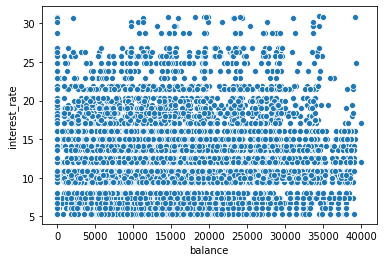

In [161]:
# plot num_collections_last_12m vs interest rate
#loan balance by interest rate
sns.scatterplot(x = df['balance'], y = df['interest_rate'])

### Notes:
From here we can see a lack of correlation between the loan balance and interest rate

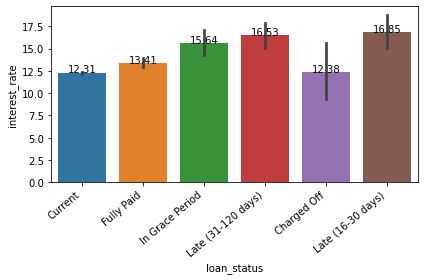

In [162]:
#loan_status by interest rate
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.2f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)
ax = sns.barplot(x = df['loan_status'], y = df['interest_rate'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
show_values_on_bars(ax)
plt.show()

### Notes
From here we can see a slight difference in interest rate between loan statuses that are late vs non-late. Because the spread of interest rates is high, we will keep this feature in our feature set.

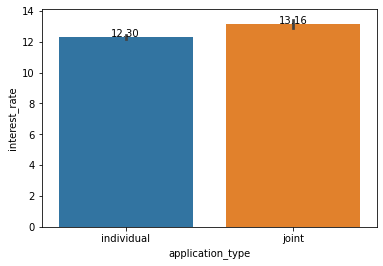

In [163]:
#application type by interest rate
ax = sns.barplot(x = df['application_type'], y = df['interest_rate'])
show_values_on_bars(ax)


### Notes
We can see a difference of .82 in interest rate between joint applications and invdividual. Because the difference is marginal and we lack robust joint applicant observations we will drop the joint observations in our dataset.


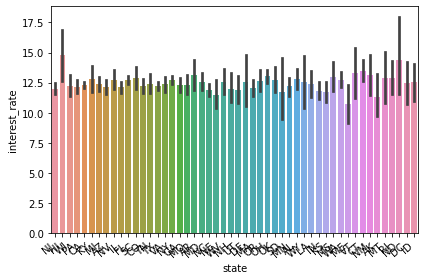

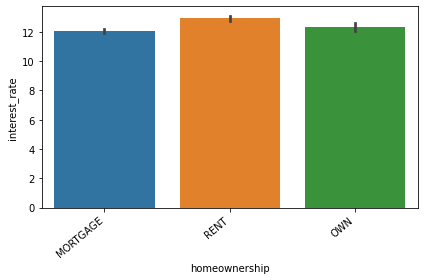

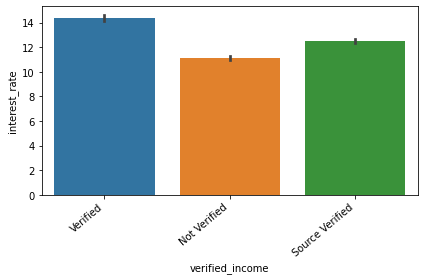

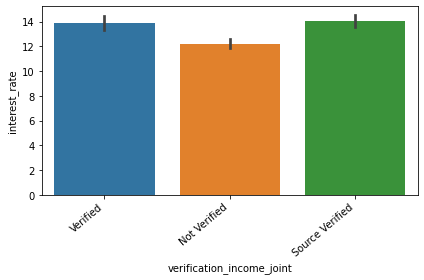

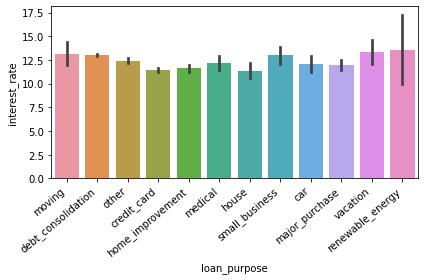

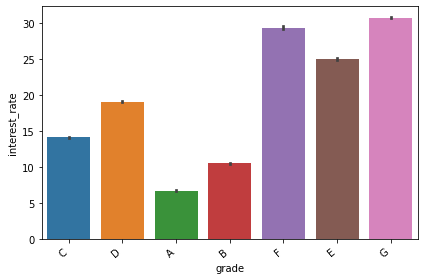

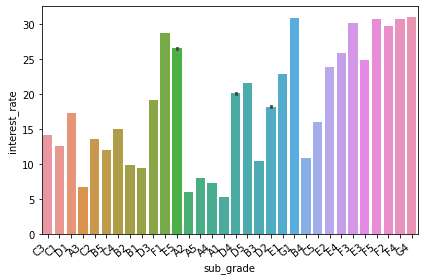

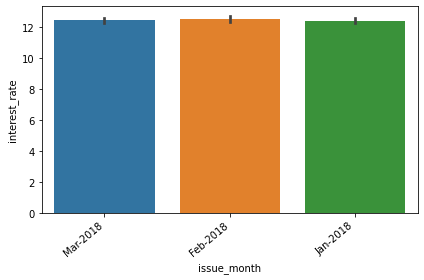

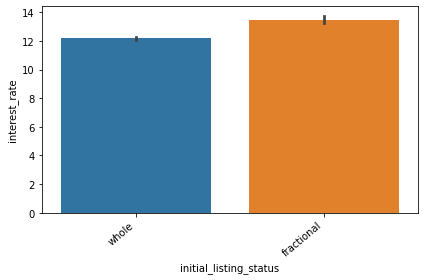

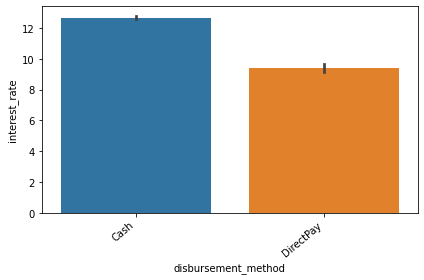

In [189]:
#remaining categorical features by interest_rate
categorical = ['state', 'homeownership', 'verified_income', 
               'verification_income_joint', 'loan_purpose',
               'grade', 'sub_grade',
              'issue_month',
              'initial_listing_status',
              'disbursement_method']
cat_df = df[categorical]
for col in cat_df.columns:
    ax = sns.barplot(x = df[col], y = df['interest_rate'])
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    plt.tight_layout()
    plt.show()

### Notes
For efficiency purposes, we plot the remaining categorical features by interest rate with a loop. In the first plot between state and interest rate we can see that some states have drastically higher/lower interest rates relative to other states. In the second plot there is a marginal difference in interest rates across homeownership, so we will remove this feature from our feature set. In the third and fourth plots there is a strong difference between verified and non verified incomes, so we will keep these features. For loan purpose by interest rate the difference across is marginal, so we will remove this feature from our feature set. In the grades by interest rates plots we can see a large discrepancy across grades, but we will only use the sub_grade feature to avoid redundancy. For the issue month by interest rate plot there is marginal differences across, so we will remove this feature. For the initial listing status and disbursement method by interest rate plots there is large differences across the groups.


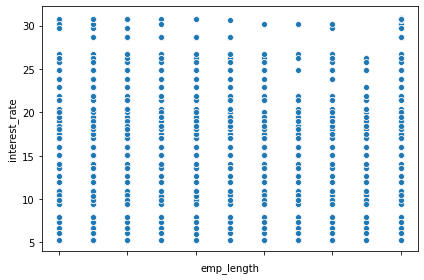

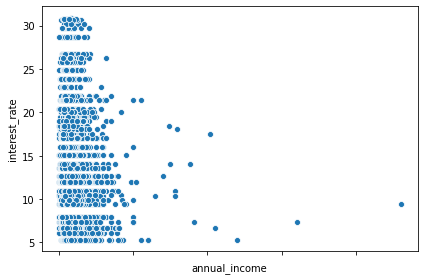

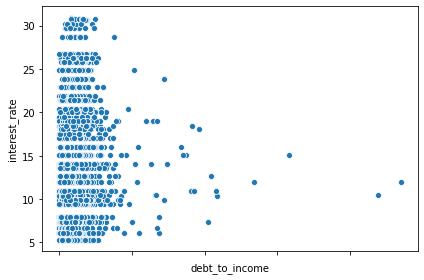

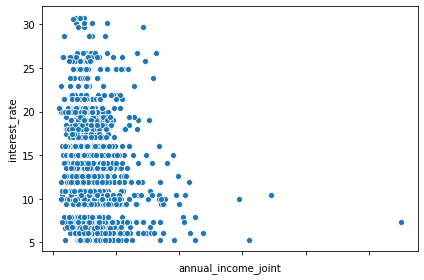

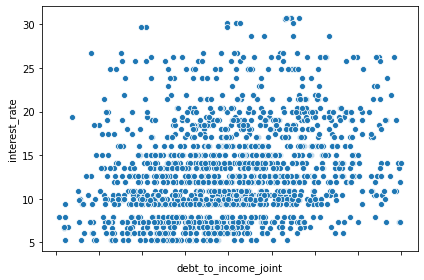

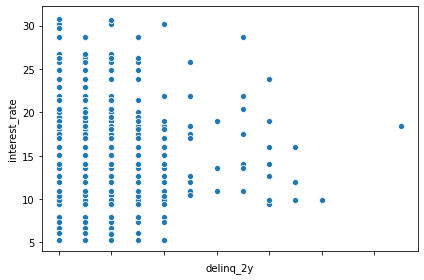

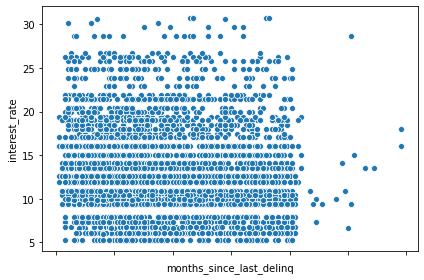

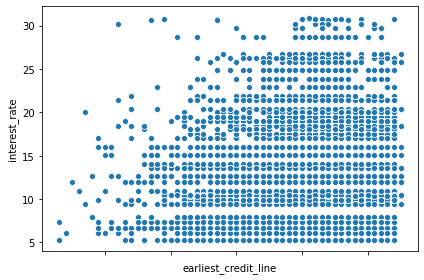

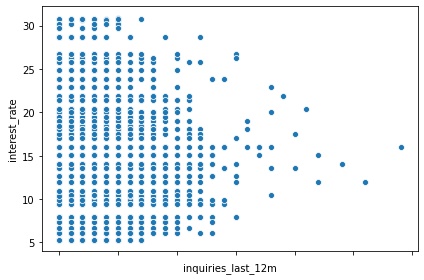

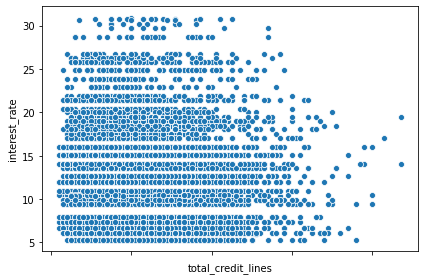

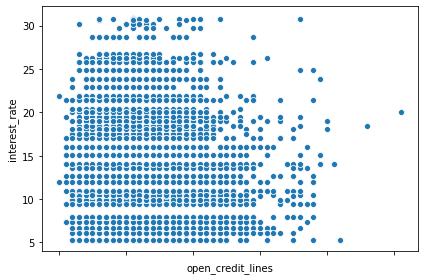

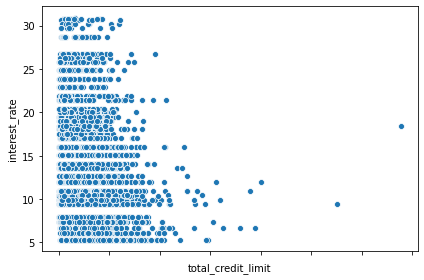

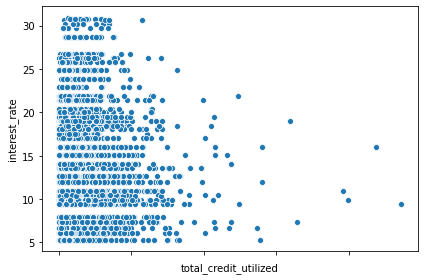

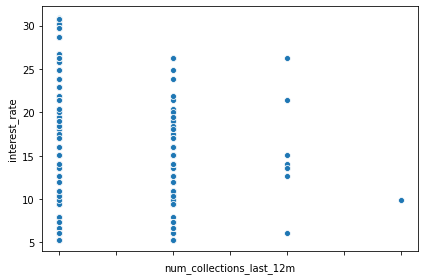

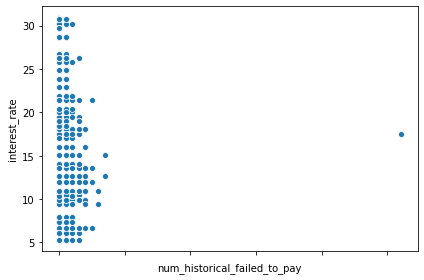

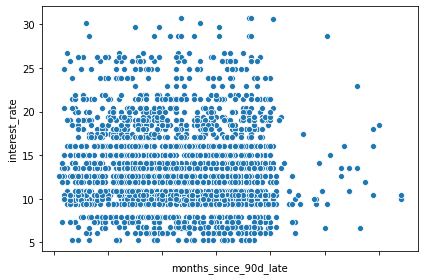

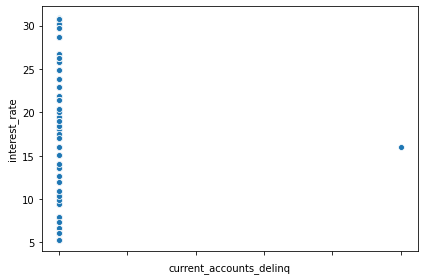

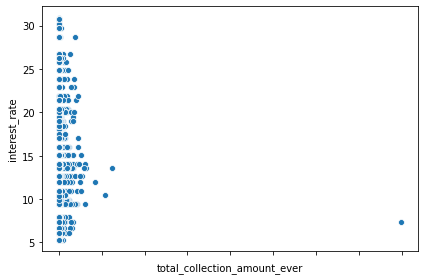

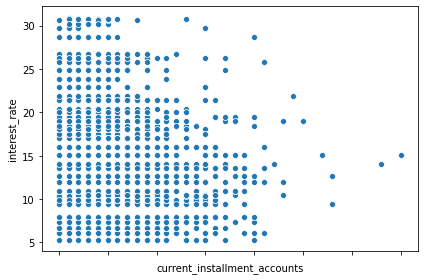

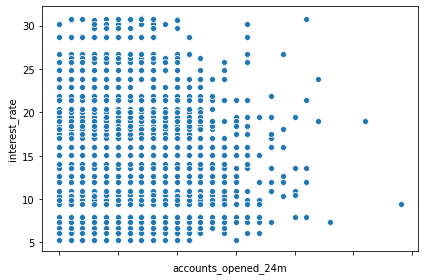

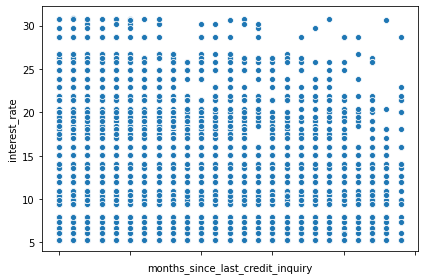

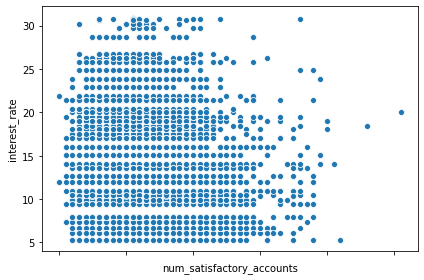

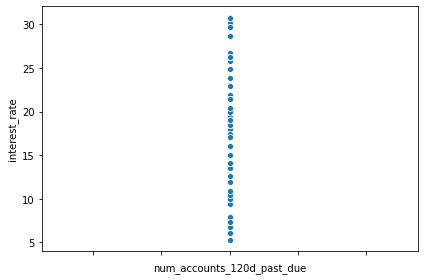

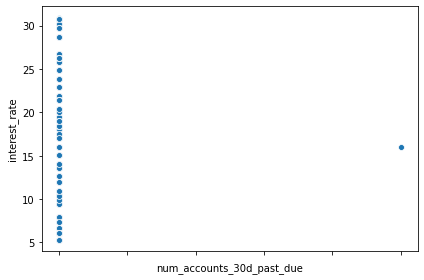

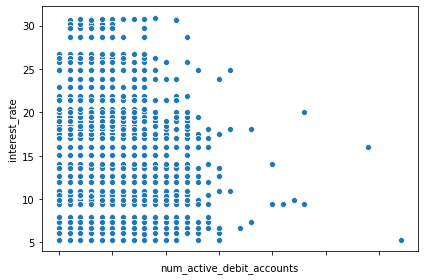

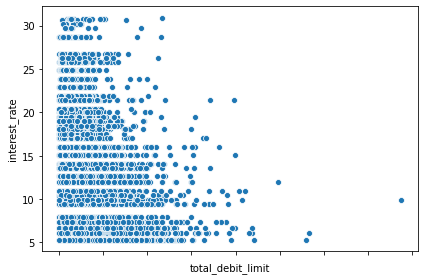

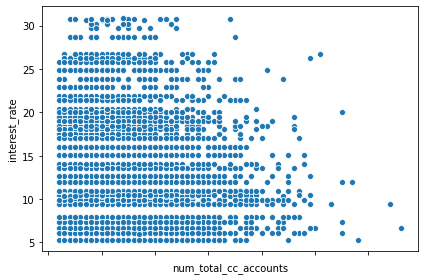

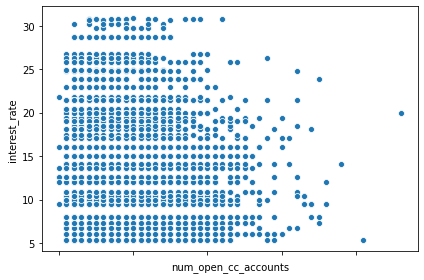

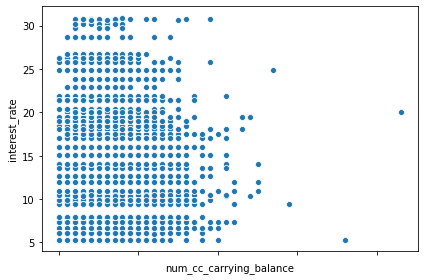

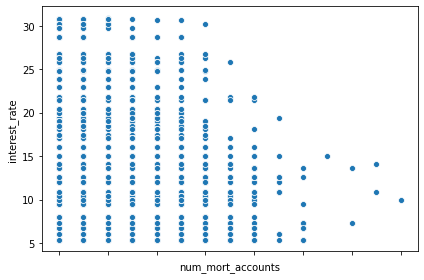

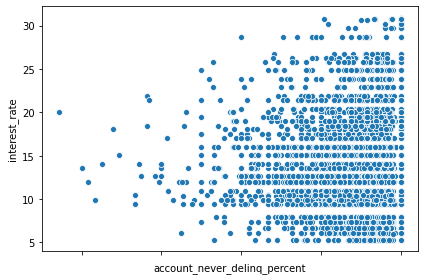

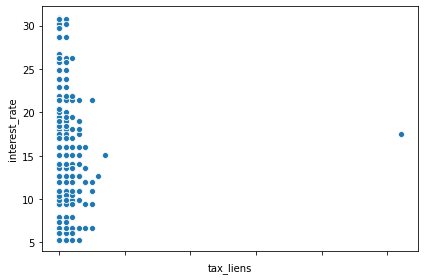

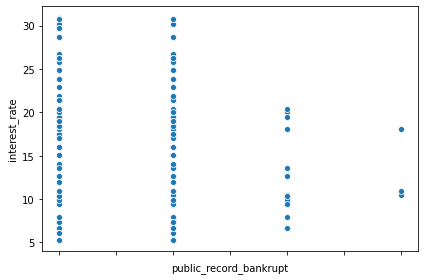

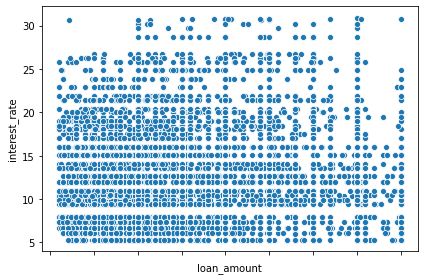

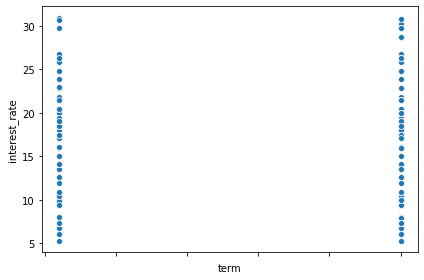

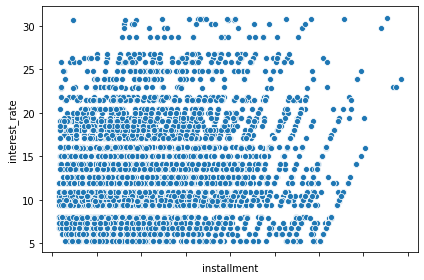

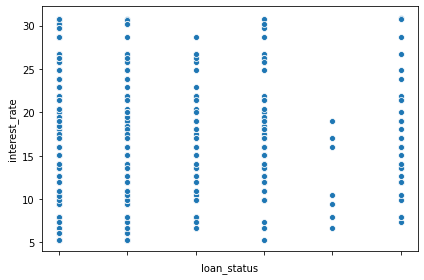

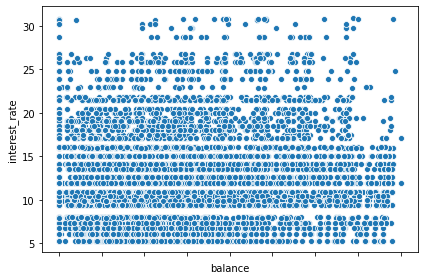

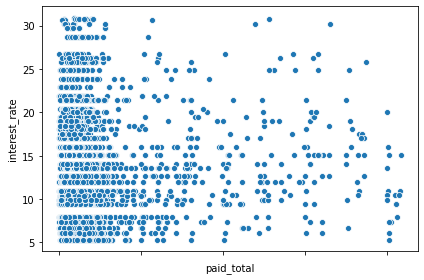

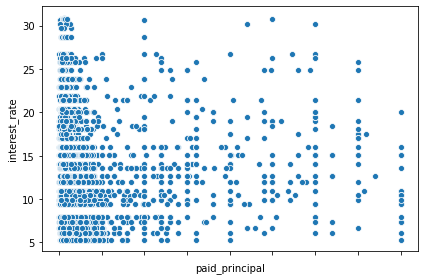

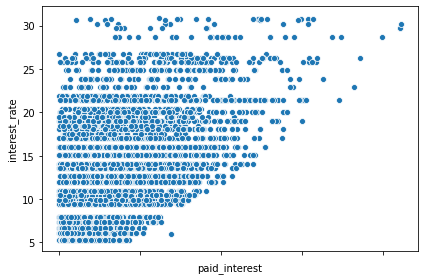

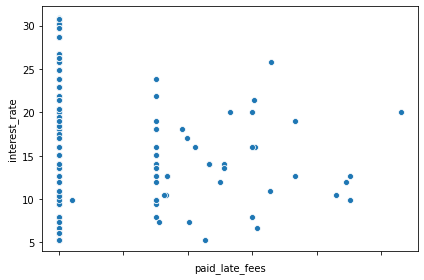

In [165]:
num_df = df.drop(columns = categorical)
num_df = num_df.drop(columns = ['application_type', 'interest_rate', 'emp_title'])
for col in num_df.columns:
    ax = sns.scatterplot(x = df[col], y = df['interest_rate'])
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    plt.tight_layout()
    plt.show()


### Notes
For efficiency purposes, we plot the remaining numerical features by interest rates. There is little correlation among the emp_length, debt_to_income_joint, total_credit_lines, open_credit_lines, total_credit_limit, num_collections_last_12m, num_historical_failed_to_pay, months_since_90d_late, current_accounts_delinq, total_collection_amount_ever, current_installment_accounts, accounts_opened_24m, months_since_last_credit_inquiry, num_satisfactory_accounts, num_accounts_120d_past_due, month_since_last_delinq, num_accounts_30d_past_due, tax_liens, loan_amount, term, balance, paid_total, paid_principal, and paid_late_fees by interest rate, so we will likely remove these features. 


In [194]:
#a condensed html display of the dataset
report = pp.ProfileReport(df)
df.head()


,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0


## Data Cleaning and Pre-processing

In [167]:
df.isna().sum()


emp_title                            833
emp_length                           817
state                                  0
homeownership                          0
annual_income                          0
verified_income                        0
debt_to_income                        24
annual_income_joint                 8505
verification_income_joint           8545
debt_to_income_joint                8505
delinq_2y                              0
months_since_last_delinq            5658
earliest_credit_line                   0
inquiries_last_12m                     0
total_credit_lines                     0
open_credit_lines                      0
total_credit_limit                     0
total_credit_utilized                  0
num_collections_last_12m               0
num_historical_failed_to_pay           0
months_since_90d_late               7715
current_accounts_delinq                0
total_collection_amount_ever           0
current_installment_accounts           0
accounts_opened_

In [247]:
#remove null rows of relevant columns
df = df[df['emp_title'].notna() & df['emp_length'].notna() & df['debt_to_income'].notna()]

#filling in na with values

df['annual_income_joint'].fillna(df['annual_income'], inplace = True)
df['verification_income_joint'].fillna(df['verified_income'], inplace = True)
df['debt_to_income_joint'].fillna(df['debt_to_income'], inplace = True)

#fill in remaining nas with 0
df.fillna(0, inplace = True)


In [180]:
copy = df.copy()
copy.fillna(0, inplace = True)
num_df.drop(columns = ['loan_status'], inplace = True)
#pearson coef calculation:
for i in num_df.columns:
    print(i)
    print(stats.pearsonr(copy[i], copy['interest_rate']))

emp_length
(-0.029488472144661233, 0.004751242770061408)
annual_income
(-0.09695640977163278, 1.3629363308435535e-20)
debt_to_income
(0.14860274106719654, 2.0463939326624263e-46)
annual_income_joint
(-0.08053551184191415, 1.1460726474353352e-14)
debt_to_income_joint
(0.21496943069920202, 2.7304366465891326e-96)
delinq_2y
(0.0908776312754585, 2.8463742392395644e-18)
months_since_last_delinq
(0.06877252878574616, 4.364760873337865e-11)
earliest_credit_line
(0.10523313526986973, 5.4335545670723424e-24)
inquiries_last_12m
(0.13527240060241824, 1.0883874765502819e-38)
total_credit_lines
(-0.035564763267768966, 0.0006602948535239339)
open_credit_lines
(-0.008558254746122169, 0.41263582545604216)
total_credit_limit
(-0.12870788769278035, 3.695481018864583e-35)
total_credit_utilized
(0.03470302221733593, 0.0008905864834148008)
num_collections_last_12m
(0.02745536095508023, 0.008571393012384583)
num_historical_failed_to_pay
(0.03952235661188776, 0.00015383064590438592)
months_since_90d_late
(0.

### Columns to drop and why

emp_title, home_ownership, loan_purpose, earliest_credit_line, grades, issue_month,
emp_length, debt_to_income, debt_to_income_joint, month_since_last_delinq, total_credit_lines, total_debit_limit, open_credit_lines, inquiries_last_12m, total_credit_limit, total_num_collections_last_12m, num_historical_failed_to_pay, months_since_90d_late, current_accounts_delinq, total_collection_amount_ever, current_installment_accounts, accounts_opened_24m, months_since_last_credit_inquiry, num_satisfactory_accounts, num_accounts_120d_past_due, num_accounts_30d_past_due, tax_liens, loan_amount, term, balance, paid_total, paid_principal, num_mort_accounts, account_never_delinq_percent, num_total_cc_carrying_balance, and paid_late_fees: these columns don't give us insight and have a lack of correlation with interest rate.



In [248]:
#drop features
drops = ['emp_title','homeownership', 'loan_purpose', 'earliest_credit_line', 
         'grade', 'issue_month', 'emp_length', 'debt_to_income', 
         'debt_to_income_joint', 'months_since_last_delinq', 
         'total_credit_lines', 'total_debit_limit', 'open_credit_lines', 
         'inquiries_last_12m', 'total_credit_limit', 'num_collections_last_12m',
         'num_historical_failed_to_pay', 'months_since_90d_late', 
         'current_accounts_delinq', 'total_collection_amount_ever', 
         'current_installment_accounts', 'accounts_opened_24m', 
         'months_since_last_credit_inquiry', 'num_satisfactory_accounts', 
         'num_accounts_120d_past_due', 'num_accounts_30d_past_due', 
         'tax_liens', 'loan_amount', 'term', 'balance', 
         'paid_total', 'paid_principal', 'num_mort_accounts', 
         'account_never_delinq_percent', 'num_total_cc_accounts','balance', 
         'paid_late_fees']
df.drop(columns = drops, inplace = True)



### Models

In [265]:
new_df = df.copy()
# binarize application_type
df['application_type'] = df['application_type'].apply(lambda x: 1 if x == 'join' else 0)

#labelencode subgrade
le = preprocessing.LabelEncoder()
df['sub_grade'] = le.fit_transform(df['sub_grade'])


#one hot encode categorical columns
subset = df[['state', 'verified_income', 'verification_income_joint', 
            'loan_status', 'initial_listing_status','disbursement_method']]
#split into training and test set
from sklearn.model_selection import train_test_split
X = df.drop(columns = ['interest_rate'])
y = df['interest_rate']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [274]:
#make a column transformer for future pipeline
from sklearn.compose import make_column_transformer
col_trans = make_column_transformer((OneHotEncoder(), ['state', 'verified_income', 'verification_income_joint', 
            'loan_status', 'initial_listing_status','disbursement_method']), remainder = 'passthrough')
col_trans.fit_transform(X_train)





In [279]:
#import models and pipeline

from sklearn.linear_model import LinearRegression, RidgeCV
linreg = LinearRegression()

from sklearn.pipeline import make_pipeline
pipe = make_pipeline(col_trans, linreg)

#model eval linear regressor
from sklearn.metrics import mean_squared_error
import math
pipe.fit(X_train, y_train)
y_predicted = pipe.predict(X_test)
mse = mean_squared_error(y_test, y_predicted)
rmse = math.sqrt(mse)
print("Linear Regression Root Mean Square Error:\n")
print(rmse)


Linear Regression Root Mean Square Error:

0.5743384455279839


In [280]:
#model eval decision tree
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(max_depth = 10)
pipe2 = make_pipeline(col_trans, tree)
pipe2.fit(X_train,y_train)
y_predicted = pipe2.predict(X_test)
mse = mean_squared_error(y_test, y_predicted)
rmse = math.sqrt(mse)
print("Decision Tree Regressor Mean Square Error:\n")
print(rmse)


Decision Tree Regressor Mean Square Error:

0.2899794653871977


In [281]:
#model eval lasso regression
from sklearn import linear_model
lasso = linear_model.Lasso(alpha = .1)
pipe3 = make_pipeline(col_trans, lasso)
pipe3.fit(X_train, y_train)
y_predicted = pipe3.predict(X_test)
mse = mean_squared_error(y_test, y_predicted)
rmse = math.sqrt(mse)
print("Lasso Regresesion Mean Square Error:\n")
print(rmse)

Lasso Regresesion Mean Square Error:

0.5768444937946247


Text(0, 0.5, 'RMSE (Root Mean Square Error)')

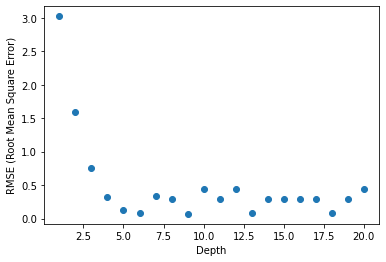

In [285]:
#model visualization
x_axis = []
y_axis = []
for i in range(20):
    x_axis.append(i+1)
    tree = DecisionTreeRegressor(max_depth = i+1)
    pipe4 = make_pipeline(col_trans, tree)
    pipe4.fit(X_train,y_train)
    y_predicted = pipe4.predict(X_test)
    mse = mean_squared_error(y_test, y_predicted)
    rmse = math.sqrt(mse)
    y_axis.append(rmse)
plt.scatter(x_axis, y_axis)
plt.xlabel('Depth')
plt.ylabel('RMSE (Root Mean Square Error)')

### Decision Tree Classifier Wins!

##### Suggestions for improvement:
- If I had more time I would perform an ANOVA analysis between the categorical variables and the interest rate, so I could determine the exact correlation between the two
- I would also perform more in-depth model tuning for the decision tree classifier
- I would include more regression models
- I would create a cutoff for the continuous features vs interest rate's Pearsons coefficient, and would only pick the features that meet the cutoff

#### Assumptions:
- The data collected was independent and collected in a fair manner
- When narrowing down the features I made some intuitive decisions to keep certain features despite a low pearson correlation coefficient

#### Process:
1. EDA
2. Visualizations
3. Missingness Eval and Solution
4. Feature Selection
5. Model Selection and Evaluation